In [ ]:
import random

random_seed = 10
random.seed(random_seed)

In [ ]:
!pip install plsa

In [ ]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 29.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 36.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 12.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatib

In [ ]:
#import modules
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary
import nltk
from nltk.corpus import stopwords
import os.path
import re
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from gensim.models import TfidfModel
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

In [ ]:
# Code partially sourced from: https://github.com/yedivanseven/PLSA/blob/master/notebooks/Examples.ipynb
# Documentation: https://probabilistic-latent-semantic-analysis.readthedocs.io/en/latest/

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from plsa import Corpus, Pipeline, Visualize
from plsa.pipeline import DEFAULT_PIPELINE
from plsa.algorithms import PLSA


from google.colab import drive
drive.mount('/content/gdrive')

#grievances_df = pd.read_csv('/content/gdrive/MyDrive/DSSI/Palm_Oil_Grievances/Data/palm_oil_grievance_logs.csv')

#shared drive version at everyone can set up
grievances_df = pd.read_csv('/content/gdrive/MyDrive/Group 3: palm oil topic classifier/Data/palm_oil_grievance_logs.csv')
grievances_df.head(5)

[nltk_data] Downloading package stopwords to
[nltk_data]     /usr/local/lib/python3.11/dist-
[nltk_data]     packages/plsa/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     /usr/local/lib/python3.11/dist-
[nltk_data]     packages/plsa/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     /usr/local/lib/python3.11/dist-
[nltk_data]     packages/plsa/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/local/lib/python3.11/dist-
[nltk_data]     packages/plsa/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


Mounted at /content/gdrive


,pk,source,internal_id,status,submitted_on,accepted_on,last_updated_on,country,region,complainants,respondents,respondent_sector,respondent_parent_company,respondent_supplier,summary,history,external_link,extras
0,1,Roundtable on Sustainable Palm Oil (RSPO),500Mg00000L0di6IAB,Closed,2/26/2025,4/15/2025,5/20/2025,Indonesia,Sumatera Selatan,Confidential,PT Sawit Mas Sejahtera,Oil Palm Growers,Golden Agri-Resources (GAR),NaN,That the Respondent allegedly transferred the ...,2025-05-20: CP's Decision Letter dated 20. 05....,https://rspo.my.site.com/Complaint/s/case/500M...,{'case_number': 'RSPO/2025/02/RR'}
1,2,Roundtable on Sustainable Palm Oil (RSPO),500GB00003xVwYqYAK,In Progress - Investigation,11/29/2024,1/16/2025,1/16/2025,Mexico,NaN,Confidential,INDUSTRIAS OLEOPALMA S.A. DE C.V.,Oil Palm Growers,Oleoquímica Mexicana S.A. de C.V.,NaN,The Complainant alleges that the Respondent ha...,2025-04-30: The Secretariat furnished the Resp...,https://rspo.my.site.com/Complaint/s/case/500G...,{'case_number': 'RSPO/2024/17/MAM'}
2,3,Roundtable on Sustainable Palm Oil (RSPO),500GB00003xVxmPYAS,In Progress - Investigation,11/28/2024,1/21/2025,1/21/2025,Colombia,Montes de María,Confidential,OLEOFLORES S A S,Processors and/or Traders,Musim Mas Holdings Pte.,NaN,1.The Complainant alleges that the Respondent ...,2025-04-30: The Complaints Panels directive to...,https://rspo.my.site.com/Complaint/s/case/500G...,{'case_number': 'RSPO/2024/18/HN'}
3,4,Roundtable on Sustainable Palm Oil (RSPO),500GB00003xVGg2YAG,In Progress - Investigation,10/16/2024,11/18/2024,11/18/2024,Indonesia,Riau,S. Samsul Hadi,PT Guntung Idamannusa,Oil Palm Growers,Compañía Industrial Aceitera Coto Cincuenta y ...,NaN,The Respondent's Corporate Social Responsibili...,2025-04-30: The Complaints Panel has directed ...,https://rspo.my.site.com/Complaint/s/case/500G...,{'case_number': 'RSPO/2024/14/RH'}
4,5,Roundtable on Sustainable Palm Oil (RSPO),500GB00003vMwFgYAK,In Progress - Investigation,9/11/2024,10/29/2024,10/29/2024,Costa Rica,Pococi/Limón,Confidential,Compañía Palma Tica S.A.,Oil Palm Growers,NaN,NaN,The Complainant alleges that the Respondent br...,2025-04-30: The Briefing Note is in progress. ...,https://rspo.my.site.com/Complaint/s/case/500G...,{'case_number': 'RSPO/2024/13/MAM'}


# LSA Model Creation Functions

## load_data_from_dataframe

In [ ]:
def load_data_from_dataframe(df_column):
    """
    Input  : Pandas Series (e.g., grievances_df['summary'])
    Purpose: Load text data from a DataFrame column
    Output : list of documents and list of titles (first 100 characters)
    """
    documents_list = df_column.dropna().tolist()
    titles = [doc[:100] for doc in documents_list]
    print("Total Number of Documents:", len(documents_list))
    return documents_list, titles

## preprocess_data

In [ ]:
# Add custom stopwords
# No lemmetization

stopwords_extra = ['pt','report','rspo','alleged', 'palm', 'oil', 'company', 'community', 'complainant',
                   'companies', 'also', 'without', 'group', 'allegedly', 'period', 'respondent', 'reported',
                   'mentioned', '2019', '19', '2020', 'subsidary', 'alleges']

from nltk.corpus import stopwords
stop = set(stopwords.words('english') + stopwords_extra)
def remove_stopwords(tokens):
    return [token for token in tokens if token.lower() not in stop]

def preprocess_data(doc_set):
    """
    Input  : docuemnt list
    Purpose: preprocess text (tokenize, removing stopwords, and stemming)
    Output : preprocessed text
    """
    # initialize regex tokenizer
    tokenizer = RegexpTokenizer(r'\w+')

    # create English stop words list
    #en_stop = set(stopwords.words('english') + stopwords_extra)
    en_stop = set(stopwords.words('english') + stopwords_extra)

    # Create p_stemmer of class PorterStemmer
    p_stemmer = PorterStemmer()
    # list for tokenized documents in loop
    texts = []
    # loop through document list
    for i in doc_set:
        print(i)
        # clean and tokenize document string
        raw = i.lower()
        tokens = tokenizer.tokenize(raw)
        # remove stop words from tokens
        stopped_tokens = [i for i in tokens if not i in en_stop]
        # stem tokens
        stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
        # add tokens to list
        texts.append(stemmed_tokens)
    return texts


In [ ]:
pipeline = Pipeline(*DEFAULT_PIPELINE, remove_stopwords)
custom_pipeline = [step for step in DEFAULT_PIPELINE if step.__class__.__name__ != "LemmatizeWords"]
pipeline = Pipeline(*custom_pipeline, remove_stopwords)
pipeline

Pipeline:
0: remove_non_ascii
1: to_lower
2: remove_numbers
3: tag_remover
4: punctuation_remover
5: tokenize
6: RemoveStopwords
7: short_word_remover
8: remove_stopwords

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [ ]:
grievances_summary = grievances_df['summary'].dropna()
grievances_summary.to_csv('summary.csv', index=False)



corpus = Corpus.from_csv('/content/summary.csv', pipeline)
corpus

Corpus:
Number of documents: 387
Number of words:     3716

In [ ]:
n_topics = 7

plsa = PLSA(corpus, n_topics, True)
plsa

PLSA:
====
Number of topics:     7
Number of documents:  387
Number of words:      3716
Number of iterations: 0

In [ ]:
result = plsa.fit()
plsa


PLSA:
====
Number of topics:     7
Number of documents:  387
Number of words:      3716
Number of iterations: 91

In [ ]:
result = plsa.best_of(10)
result

PlsaResult:
Number of topics:    7
Number of documents: 387
Number of words:     3716

In [ ]:
result.topic

array([0.17136077, 0.15472895, 0.14631245, 0.13768822, 0.13757196,
       0.1274637 , 0.12487394])

In [ ]:
result.word_given_topic

((('indications', 0.010563157460136008),
  ('earth', 0.010238095286219492),
  ('mighty', 0.01003870904240553),
  ('concession', 0.009953276399958626),
  ('rapid', 0.009940887294453124),
  ('response', 0.00938415139864567),
  ('deforestation', 0.008958680304754777),
  ('hectares', 0.006760458917261548),
  ('cleared', 0.006710568838107082),
  ('total', 0.0066253076136592514),
  ('area', 0.006492873467678668),
  ('gar', 0.006480562112093507),
  ('forests', 0.006431695667844808),
  ('inside', 0.006312575773195368),
  ('sawit', 0.0062913041437723805),
  ('ran', 0.006114353763163177),
  ('forest', 0.006108356933237125),
  ('acres', 0.005088717819766871),
  ('leuser', 0.00457449947069499),
  ('clearance', 0.004464486849144754),
  ('may', 0.004442475316019795),
  ('agro', 0.004378787914637803),
  ('sep', 0.004323076319208757),
  ('internal', 0.004030265356913286),
  ('makmur', 0.003954881902300392),
  ('june', 0.00388203460551713),
  ('according', 0.0038551107820462547),
  ('april', 0.00385221

In [ ]:
result.tf_idf

True

In [ ]:
for x in range(0,7):
  print(f"Topic {x}:")
  print(result.word_given_topic[x][:10]) # First 10 words of topic x)


Topic 0:
(('indications', 0.010563157460136008), ('earth', 0.010238095286219492), ('mighty', 0.01003870904240553), ('concession', 0.009953276399958626), ('rapid', 0.009940887294453124), ('response', 0.00938415139864567), ('deforestation', 0.008958680304754777), ('hectares', 0.006760458917261548), ('cleared', 0.006710568838107082), ('total', 0.0066253076136592514))
Topic 1:
(('river', 0.0064499694294193445), ('growers', 0.005847984794406259), ('electricity', 0.004673759876523886), ('even', 0.004385988595804695), ('small', 0.004385988595804694), ('complainants', 0.004117489212814376), ('department', 0.003904069731960722), ('ffb', 0.0038309036949742523), ('holder', 0.0035400501754382584), ('income', 0.0033383999118027762))
Topic 2:
(('principle', 0.005909057664741392), ('new', 0.0057840181630219156), ('water', 0.005573066050088792), ('communities', 0.005516747152303256), ('fire', 0.005360047341945388), ('operations', 0.004457018812346115), ('process', 0.004364980004379406), ('gvl', 0.0043

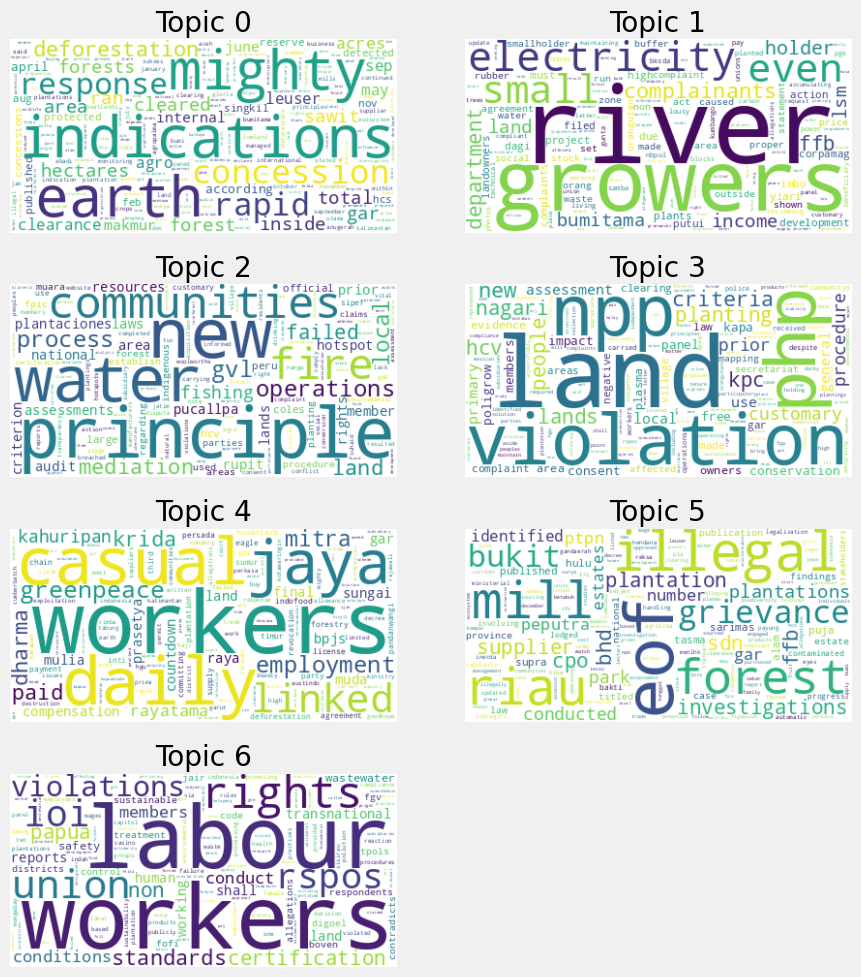

In [ ]:
visualize = Visualize(result)
visualize

fig = plt.figure(figsize=(9.4, 10))
_ = visualize.wordclouds(fig)

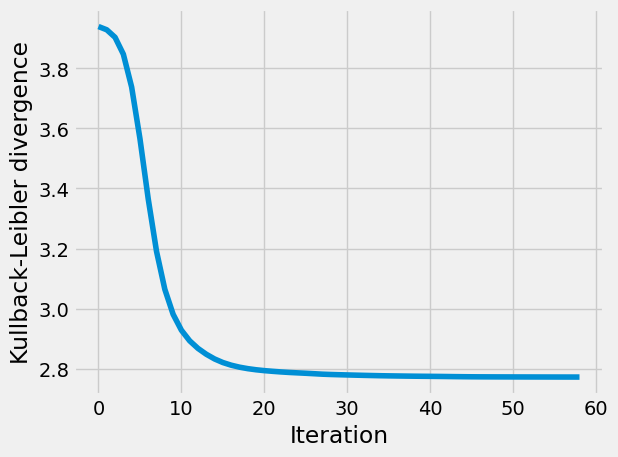

In [ ]:
# this divergence measures how much information is lost when using Q to approximate P.

fig, ax = plt.subplots()
_ = visualize.convergence(ax)
fig.tight_layout()

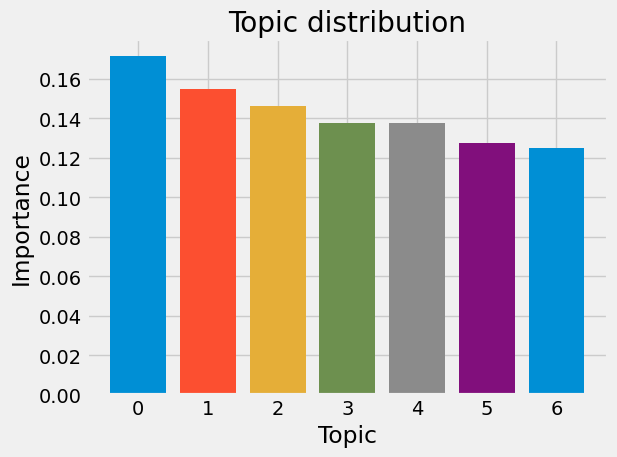

In [ ]:
fig, ax = plt.subplots()
_ = visualize.topics(ax)
fig.tight_layout()

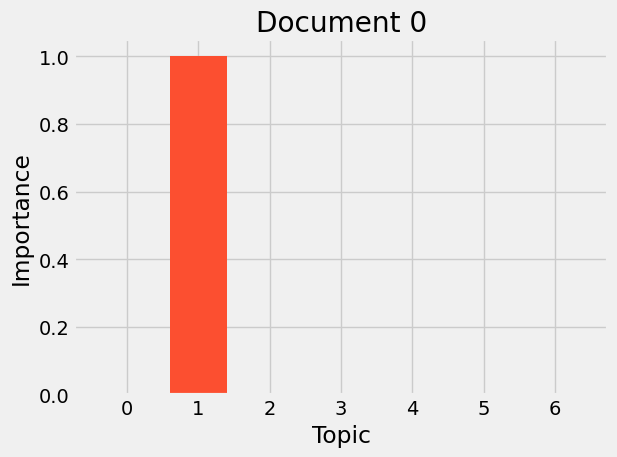

In [ ]:
fig, ax = plt.subplots()
_ = visualize.topics_in_doc(0, ax) # change int to change doc
fig.tight_layout()

In [ ]:
result.topic_given_doc[2]

array([0.00000000e+00, 0.00000000e+00, 2.92837185e-09, 3.57358318e-09,
       0.00000000e+00, 0.00000000e+00, 9.99999993e-01])

## creating the data frame

In [ ]:
def prepare_corpus(doc_clean):
    """
    Input  : clean document
    Purpose: create term dictionary of our courpus, converting list of documents (corpus) into Document Term Matrix,
             and applying TF-IDF weighting.
    Output : term dictionary, TF-IDF weighted Document Term Matrix, and TF-IDF model
    """
    # Creating the term dictionary of our corpus, where every unique term is assigned an index.
    dictionary = corpora.Dictionary(doc_clean)

    # Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

    # Applying TF-IDF weighting
    tfidf_model = TfidfModel(doc_term_matrix)
    tfidf_matrix = tfidf_model[doc_term_matrix]

    # generate LDA model
    return dictionary, tfidf_matrix, tfidf_model

In [ ]:
#Input: LSA model, corpus (in this case TFIDF matrix), text (summary column)
#Output: Dataframe consisting of every row
def format_topics_sentences(model=None, corpus=None, texts=None):
    # Collect rows in a list
    rows = []

    doc_topics = model.transform(corpus)
    for i, doc in enumerate(doc_topics):
        # Create Dict for Topic contributions, and normalize values
        total_weight = sum(abs(weight) for _, weight in doc)
        topic_dist = {
            f"Topic_{topic_id}_Perc": round((abs(weight) / total_weight) * 100, 2) # Finds and normalizes weights for each topic
            for topic_id, weight in doc
        }

        # Create Dict for Multi-Label Binary Classifcation
        topic_binary = {
            f"Topic_{topic_id}_Indicate": 0
            for topic_id, weight in doc
        }

        shared_perc = 0 # Shared contribution amongst topics given to document
        sorted_doc = sorted(topic_dist.items(), key=lambda x: abs(x[1]), reverse=True)
        dom_topic_num = 0
        is_outlier = False

        # Get Dominant Topics
        itr = 0
        while (shared_perc < 50.0):
            # Get Topic Number and Topic Percentage
            topic_num, topic_perc = sorted_doc[itr]
            topic_num = int(re.search(r'\d+', topic_num).group()) # Use REGEX to grab num
            shared_perc += topic_perc
            topic_binary[f"Topic_{topic_num}_Indicate"] = 1  # Multi-Label Binary Classifcation

            # Get Prime Dominant Topic
            if itr == 0:
                dom_topic_num = topic_num
            itr += 1

            # Check if Outlier
            if (itr) > (number_of_topics/2):
                is_outlier = True

        topic_keywords = ", ".join([word for word, _ in model.show_topic(dom_topic_num)])

        # Create Row for Document
        row = {
            'Dominant_Topic': int(dom_topic_num),
            'Perc_Contribution': topic_perc,
            'Topic_Keywords': topic_keywords,
            'Text': texts[i],
            'Is_Outlier': is_outlier,
            'Dom_Topics_Num': itr
        }
        row.update(topic_dist) # Add individual topic contributions
        row.update(topic_binary) # Add Multi-Label Binary Classifcation for topics
        rows.append(row)

    # Create DataFrame
    sent_topics_df = pd.DataFrame(rows)
    return sent_topics_df

In [ ]:
import numpy as np
import pandas as pd

def format_topics_sentences(model, texts):
    doc_topic = model._doc_given_topic.T  # shape: (n_docs, n_topics)

    rows = []
    for i, topic_dist in enumerate(doc_topic):
        dominant_topic = np.argmax(topic_dist)
        topic_contribution = topic_dist[dominant_topic]
        rows.append((i, dominant_topic, topic_contribution, texts[i]))

    return pd.DataFrame(rows, columns=['Document_No', 'Dominant_Topic', 'Topic_Perc_Contribution', 'Text'])

In [ ]:
document_list, titles = load_data_from_dataframe(grievances_df['summary'])
clean_text = preprocess_data(document_list)
document_list

Total Number of Documents: 387
That the Respondent allegedly transferred the Complainant to a different department purportedly as punishment for providing information to the auditors during the Respondents audit period.The Complainant alleges that he is made to work extra hours and his wages do not commensurate with his work load.
The Complainant alleges that the Respondent has unjustifiably dismissed workers, deceiving them into resigning with the promise that they will be rehired;It is alleged that the Respondent did not pay the dismissed workers the full amount of compensation for early termination of contract, breaching Mexican federal labour law;The Respondent bribed the authorities to obtain the parcel certificate from the National Agrarian Registry (RAN) required by Mexican Law;It is alleged that the Respondent has falsified information regarding land ownership in order to use it as evidence to avoid the imposition of non-conformities during audits; andThe Complainant alleges th

['That the Respondent allegedly transferred the Complainant to a different department purportedly as punishment for providing information to the auditors during the Respondents audit period.The Complainant alleges that he is made to work extra hours and his wages do not commensurate with his work load.',
 'The Complainant alleges that the Respondent has unjustifiably dismissed workers, deceiving them into resigning with the promise that they will be rehired;It is alleged that the Respondent did not pay the dismissed workers the full amount of compensation for early termination of contract, breaching Mexican federal labour law;The Respondent bribed the authorities to obtain the parcel certificate from the National Agrarian Registry (RAN) required by Mexican Law;It is alleged that the Respondent has falsified information regarding land ownership in order to use it as evidence to avoid the imposition of non-conformities during audits; andThe Complainant alleges that crude oil palm is stor

In [ ]:
dir(plsa)

['_BasePLSA__e_step',
 '_BasePLSA__n_topics',
 '_BasePLSA__negative_entropy',
 '_BasePLSA__norm',
 '_BasePLSA__normalize',
 '_BasePLSA__random',
 '_BasePLSA__rel_change',
 '_BasePLSA__tf_idf',
 '_BasePLSA__validated',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_conditional',
 '_corpus',
 '_doc_given_topic',
 '_doc_word',
 '_invert',
 '_joint',
 '_kl_divergences',
 '_m_step',
 '_norm_sum',
 '_result',
 '_topic',
 '_word_given_topic',
 'best_of',
 'fit',
 'n_topics',
 'tf_idf']

In [ ]:
# Grab TFIDF matrix from prev functions
_ , tfidf_matrix , _ = prepare_corpus(clean_text)

# Format
dominant_topic_df = format_topics_sentences(model=plsa, texts=document_list).reset_index()
dominant_topic_df.head(10)

,index,Document_No,Dominant_Topic,Topic_Perc_Contribution,Text
0,0,0,124,0.144606,That the Respondent allegedly transferred the ...
1,1,1,116,0.051155,The Complainant alleges that the Respondent ha...
2,2,2,51,0.057223,1.The Complainant alleges that the Respondent ...
3,3,3,134,0.155247,The Respondent's Corporate Social Responsibili...
4,4,4,117,0.430906,The Complainant alleges that the Respondent br...
5,5,5,113,0.234107,1. The Complainant alleges that he informed th...
6,6,6,127,0.058703,The Respondent has allegedly conducted land cl...


In [ ]:
# Convert to CSV and save
dominant_topic_df.to_csv("pLSA_results.csv",index = False)
from google.colab import files
# files.download("LSA_results.csv")

In [ ]:
dominant_topic_df[dominant_topic_df['Dominant_Topic'] == 127]

,index,Document_No,Dominant_Topic,Topic_Perc_Contribution,Text
6,6,6,127,0.058703,The Respondent has allegedly conducted land cl...


## Average Dominant Topic Contribution

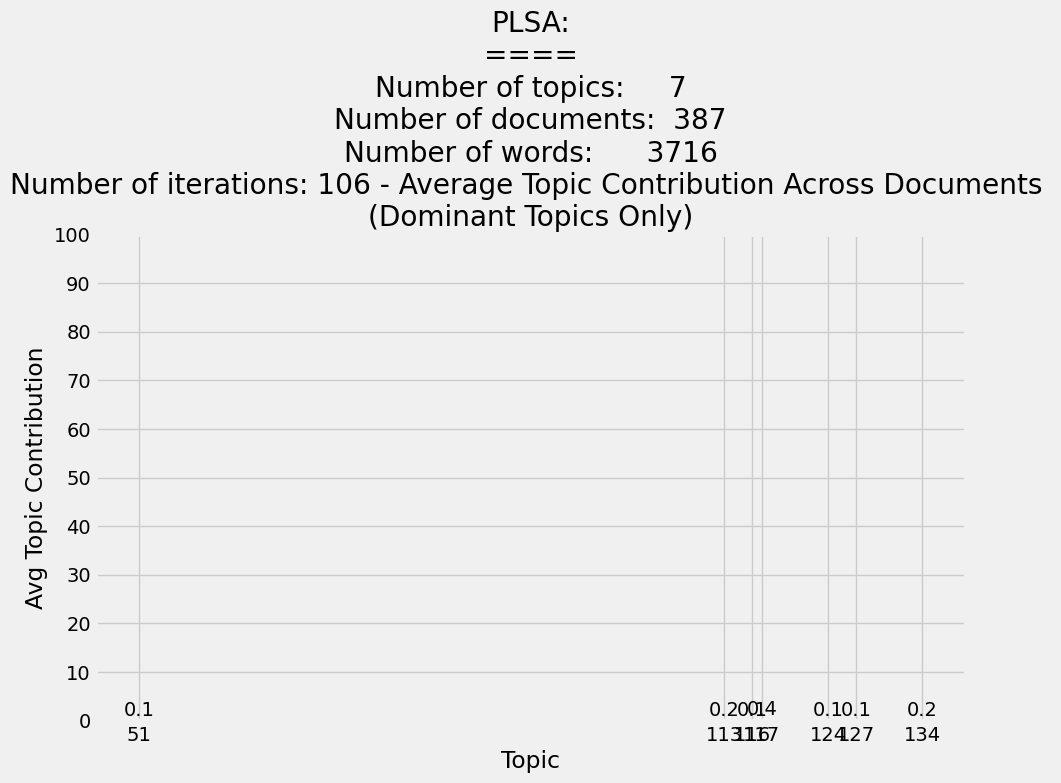

In [ ]:
# Prepare data
topic_avg_df = dominant_topic_df.groupby('Dominant_Topic')['Topic_Perc_Contribution'].mean().reset_index()
indexes = topic_avg_df['Dominant_Topic']
values = topic_avg_df['Topic_Perc_Contribution'].round(1)

colors = plt.cm.nipy_spectral(np.linspace(0, 1, len(indexes)))

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(indexes, values, color=colors[:len(indexes)])
ax.bar_label(bars)

# Labels and title
ax.set_title(f'{plsa} - Average Topic Contribution Across Documents \n(Dominant Topics Only)')
ax.set_xlabel('Topic')
ax.set_ylabel('Avg Topic Contribution')
plt.xticks(indexes)
plt.yticks(range(0,101,10))
plt.show()

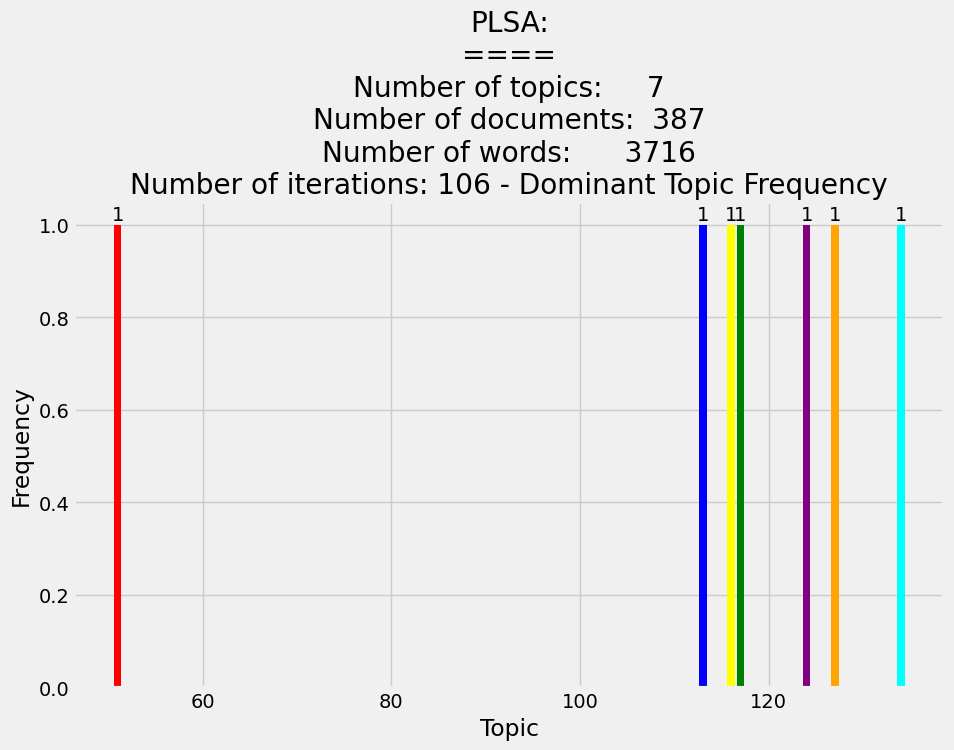

In [ ]:
# Prepare data
topics_df = dominant_topic_df.groupby(['Dominant_Topic'])['index'].count().reset_index()
indexes = topics_df['Dominant_Topic']
values = topics_df['index']
colors_7 = ['red', 'blue', 'yellow', 'green', 'purple', 'orange', 'cyan']

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(indexes, values, color=colors_7[:len(indexes)])
ax.bar_label(bars)

# Labels and title
ax.set_title(f'{plsa} - Dominant Topic Frequency')
ax.set_xlabel('Topic')
ax.set_ylabel('Frequency')
plt.show()